<a href="https://colab.research.google.com/github/HARJAP-SINGH-3105/Pair-Trading-Strategy/blob/main/Pair_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
# import the libraries
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import fix_yahoo_finance as yf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


def downloadStockData(tickers,start,end):
    
    """
        This function downloads the Close price of the stock and creates a dataframe from it
        Params:

            tickers : a list of ticker of various stocks
            start   : it is the start date of the data to be downloaded. It is a datetime in datetime format.
            end     : it is the end date of the data to be downloaded. It is a datetime in datetime format.

        Return:
            A dataframe with all the close for of each stock on each open market day
    """
    ticker_data = pdr.get_data_yahoo(tickers, start, end)['Close']
    return ticker_data

def zscore(series):
    return (series - series.mean()) / np.std(series)

def plot_ratios(ratio):
    """
        This function just plots the ratios plot 
      efc  Params:
            ratio : a list of the the ration of two stock price 
    """
    ratios.plot()
    plt.axhline(ratios.mean(),color="yellow")
    plt.show()


In [ ]:
def findCointegrationValue(data,p_value_threshold=0.05):
        """
            This function find out the pairs of stock with p value less than a constant
            Params:
                data               : the dataframe containning all the close for of each stock on each open market day
                p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

            Returns:
                p values of all the pairs , the list of all the pairs with p value less than the threshold 
        """
        list = []
        list_p_value =[]
        key = data.keys()   # it is giving the list containing the name of columns...................
        p_matrix = np.ones([len(key),len(key)])

        for i in range(len(key)): 

          for j in range(i+1,len(key)):
            result = coint(data[key[i]],data[key[j]])
            score = result[0]
            p_matrix[i,j] = result[1]
            if p_matrix[i,j]<p_value_threshold:
                list.append((key[i],key[j]))
                list_p_value.append(p_matrix[i,j])

        return list ,list_p_value ,p_matrix     
       


In [ ]:
def getBestKCointergratedStocks(data,k=10,p_value_threshold=0.05):
                                            
        """
            This functions find out the k pairs with the least p value and all of them should be less than the threshold  
            Params:
                
                data               : the dataframe containning all the close for of each stock on each open market day
                k                  : the number of pairs to be found out
                p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

            Returns:
                the p value for all the pairs of stocks , the list k pairs with the least p value and their p values . If k such pairs doesn't exists return how many of them occur 
        """
     
        list, list_p_value , p_matrix =findCointegrationValue(data)

        if k<len(list_p_value):
          while(len(list)!=k):
            index = list_p_value.index(max(list_p_value))
            list_p_value.pop(index)
            list.pop(index)
            
        return p_matrix,list,list_p_value 




                                          
       


In [ ]:
def distanceBetweenStocks(data1,data2):
    """
        This function takes list of two stocks and find the distance between the stocks 
        Params:
            data1: list of stock price of stock1
            data2: list of stock price of stock2
            window_size : the window size
        Returns:
            the distance between the lists

        Note:
            In this function do try to normalise the stock price and try out some variations in it.
    """
    normalized_data1 = zscore(data1);
    normalized_data2 = zscore(data2);
    sum =0;
    for i in range(len(normalized_data1)):
      sum = sum  + abs(normalized_data1[i]-normalized_data2[i])
    return sum  

    


In [ ]:
def getBestKLessDistanceStocks(data,k=10):
    """
       
        This functions find out the k pairs with the least distance between them  
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            k                  : the number of pairs to be found out
            
        Returns:
            the distance between all the stock pairs, the list of k pairs with the least distance between them
    """
    key = data.keys()
    distance= []
    list_pairs=[]


    for i in range(len(key)): 
      for j in range(i+1,len(key)):
        distance.append(distanceBetweenStocks(data[key[i]],data[key[j]]))
        list_pairs.append((key[i],key[j]))

    all_distance = distance.copy()
    if k<len(distance):
          while(len(distance)!=k):
            index = distance.index(max(distance))
            distance.pop(index)
            list_pairs.pop(index)
    return all_distance,distance,list_pairs
    

     

In [ ]:
tickers = ['HD', 'DIS','MSFT', 'BA', 'MMM', 'PFE', 'NKE', 'JNJ', 'MCD', 'INTC', 'XOM', 'GS', 'JPM', 'AXP', 'V', 'IBM', 'UNH', 'PG', 'GE', 'KO', 'CSCO', 'CVX', 'CAT', 'MRK', 'WMT', 'VZ', 'RTX', 'TRV', 'AAPL', 'ADBE', 'EBAY', 'QCOM', 'HPQ', 'JNPR', 'AMD']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2017,1,1)
data = downloadStockData(tickers,start,end)

In [ ]:
list_pairs , p_value_list,p_matrix =findCointegrationValue(data)

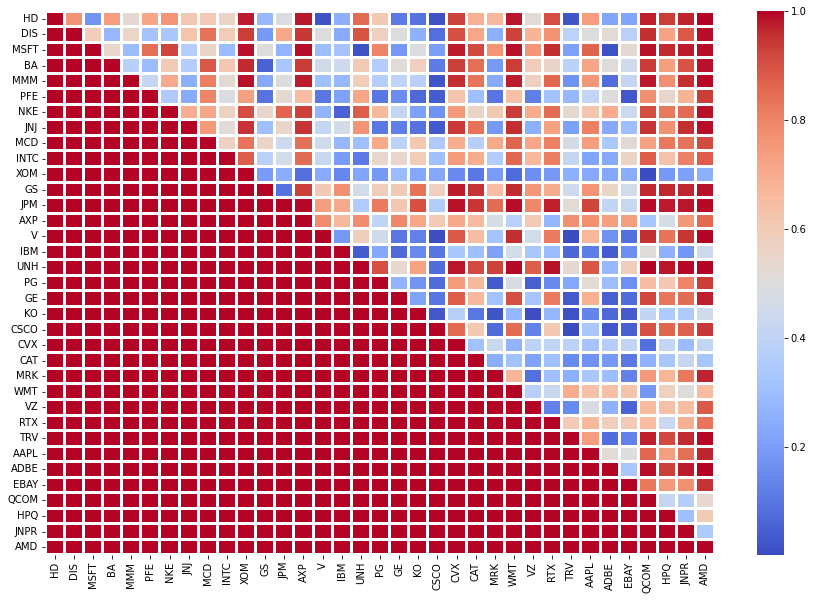

In [ ]:

key = data.keys()
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(p_matrix, xticklabels=key, 
                yticklabels=key, cmap='coolwarm',linewidth =2
            )

In [ ]:
p_matrix_k , list_k_pairs, list_k_p_values =getBestKCointergratedStocks(data)

In [ ]:
print(list_k_pairs)
print(list_k_p_values)
print(p_matrix_k)

[('HD', 'V'), ('HD', 'CSCO'), ('MSFT', 'UNH'), ('MSFT', 'ADBE'), ('XOM', 'QCOM'), ('V', 'CSCO'), ('V', 'TRV'), ('KO', 'VZ'), ('KO', 'TRV'), ('CSCO', 'TRV')]
[0.021555333164112074, 0.016384722094730436, 0.017621355400086507, 0.015095521088345405, 0.0022465857696209236, 0.00906646889101516, 0.005786046622701707, 0.00631237685580102, 0.01749378940343339, 0.0021288663559357545]
[[1.         0.7662014  0.17393681 ... 0.93541599 0.97165632 1.        ]
 [1.         1.         0.59345302 ... 0.72671761 0.88410737 0.99038097]
 [1.         1.         1.         ... 0.9619186  0.97680393 0.99220169]
 ...
 [1.         1.         1.         ... 1.         0.3096161  0.60127441]
 [1.         1.         1.         ... 1.         1.         0.34699042]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [ ]:
#  Finding the distance between these stock pairs
list_all_distance ,list_k_distance ,list_distance_pairs = getBestKLessDistanceStocks(data)





In [ ]:
print(list_distance_pairs)
print(list_k_distance)

[('HD', 'V'), ('HD', 'TRV'), ('HD', 'ADBE'), ('MSFT', 'ADBE'), ('MMM', 'JNJ'), ('MMM', 'TRV'), ('MMM', 'ADBE'), ('V', 'TRV'), ('V', 'ADBE'), ('UNH', 'ADBE')]
[187.42388105600696, 251.24271479173296, 336.3687311785594, 315.02459413631817, 301.70125919078873, 314.91418558238723, 293.9422866913731, 277.36414718875716, 297.95699052785295, 319.9848285277117]


### Based on the above matrix plot and p-value approach and distance method ,2 stocks which I found  similar or cointegrated can be "VZ" and "CSCO" ; "ADBE" and "MSFT"----> Reasons:

1.  Each pair have firms belonging to same sector or field.
2.  Each pair statsiify the condition of Threshold value.
*   Both pairs also  also less distance between series.
*  Others might have less p- value or distance between series but they belong to different sectors which make them unlikely to be cointegrated 







0.17267699875782072


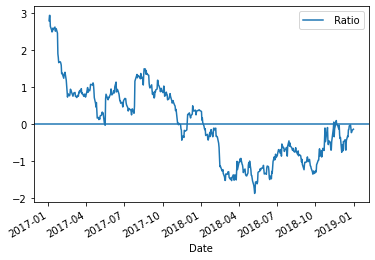

In [ ]:
#  PLoting the ratios for "V" and "CSCO"
series1 = data['VZ']
series2 = data['CSCO']
score, pvalue,_ = coint(series1, series2)
print(pvalue)
ratios = series1/series2
ratios = zscore(ratios)
ratios.plot()
plt.axhline(ratios.mean())
plt.legend([' Ratio'])
plt.show()

0.18615286513855878


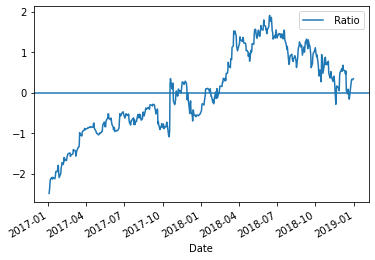

In [ ]:
series1 = data['ADBE']
series2 = data['MSFT']
score, pvalue,_ = coint(series1, series2)
print(pvalue)
ratios = series1/series2
ratios =zscore(ratios)
ratios.plot()
plt.axhline(ratios.mean())
plt.legend([' Ratio'])
plt.show()

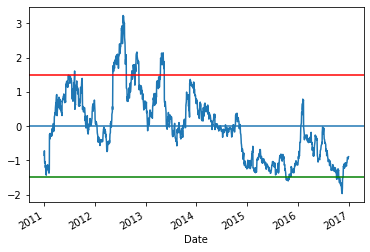

In [ ]:
# Setting up limit and boundary for "VZ" and "CSCO" pair to generate the signal..
Ratio = data["VZ"]/data["CSCO"]
Serie = zscore(Ratio)
Serie.plot()
Mean =Serie.mean()
plt.axhline(Mean)
plt.axhline(Mean + 1.5*np.std(Serie), color='red')
plt.axhline(Mean -1.5*np.std(Serie), color='green')
plt.show()

In [ ]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2019,1,1)
data = downloadStockData(tickers,start,end)

In [ ]:
def trade1(data1, data2, window ,MAX_SHORTING_AMOUNT=10000, MAX_TRANSACTION_AT_A_TIME=5,c1=1,c2=0.75):
    """
        This functions performs the trading according to the following strategy
            For the distance approach , we will use the mean and standard deviation . If the ratio(Y/X) between the time series at any point becomes such that it is greater 
            than the mean+c_1*standard deviation  we will short the stock Y and go for long X and square off whenever the ratio becomes less than   mean+ c_2*standard deviation, 
            where c1 and c2 are constant here ,  like c_1=1, c_1=0.5 ,etc. Note c_1>c_2 If the ratio becomes less than the mean - c1*standard deviation , we will follow the reverse strategy .
        Params: 
            data1                     : Time series data of stock 1
            data2                     : Time series data of stock 2
            window                    : The size of the datapoints from which we calculate the mean and standard deviation for each time 
            MAX_SHORTING_AMOUNT       : The maximum amount of money , for which the stocks can be shorted at a time
            MAX_TRANSACTION_AT_A_TIME : the number of times we can short a stock , in each shorting we do the shorting worth  MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
            c1                        : A constant with usage stated above 
            c2                        : A constant with usage stated above
        Return: 
            The profit which we can make by using this method
    """
    # Visualizing the data
    ratio = data1/data2
    Series = ratio.rolling(window,center=False).mean()
    z_score_series = zscore(Series)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(z_score_series , "r") 
    Mean = z_score_series.mean()
    Std =z_score_series.std()
    plt.axhline(Mean+c1*Std, color='black',linestyle='--')
    plt.axhline(Mean +c2*Std, color='blue', linestyle='--')
    plt.axhline(Mean, color='orange',linestyle='-')
    plt.axhline(Mean -c2*Std, color='y', linestyle='--')
    plt.axhline(Mean -c1*Std, color='green', linestyle='--')
    plt.legend(['Rolling Ratio z-score', 'Mean + c1*Std', 'Mean + c2*Std','Mean','Mean - c2*Std','Mean - c1*Std'])
    plt.show()
    # Code for drawing profits
    ratio  = data1/data2
    ratio  = zscore(ratio)
    Mean = ratio.mean()
    Std = ratio.std()
    a1,a2,a3,a4 = Mean +c1*Std ,Mean +c2*Std,Mean -c2*Std ,Mean -c1*Std 
    stock1,stock2,day,money =0,0,0,MAX_SHORTING_AMOUNT
    transactions= 0
    money_used =MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
    
    for i in range(1,len(ratio)):
       if day==window:
          money = money + stock1*data1[i] + stock2*data2[i]
          stock1,stock2,day,transactions=0,0,0,0 
       if ratio[i] >=a1 and ratio[i-1] < a1 and transactions <MAX_TRANSACTION_AT_A_TIME:
          stock1 -= money_used//data1[i]
          stock2+= money_used//data2[i]
          money = money -(stock1*data1[i]+ stock2*data2[i])
          transactions+=1
       elif ratio[i]>=a2 and ratio[i-1]<a2 and transactions < MAX_TRANSACTION_AT_A_TIME:
          money = money + stock1*data1[i] + stock2*data2[i]
          stock1,stock2=0,0
       elif ratio[i] <=a4 and ratio[i-1] > a4 and transactions <MAX_TRANSACTION_AT_A_TIME:
          stock1 += money_used//data1[i]
          stock2-= money_used//data2[i]
          money = money -(stock1*data1[i]+ stock2*data2[i])
          transactions+=1
       elif ratio[i]>=a3 and ratio[i-1]<a3 and transactions < MAX_TRANSACTION_AT_A_TIME:
          money = money + stock1*data1[i] + stock2*data2[i]
          stock1,stock2=0,0  
       day+=1 
    return money -MAX_SHORTING_AMOUNT     



          

    




    

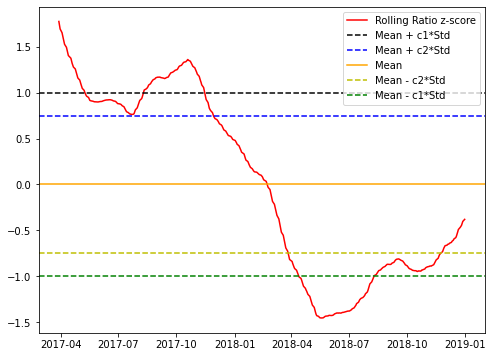

507.53078842163086

In [ ]:
trade1(data["VZ"], data["CSCO"],60)

In [ ]:
def trade2(data1, data2, window ,MAX_SHORTING_AMOUNT=10000, MAX_TRANSACTION_AT_A_TIME=5,c1=1,c2=0.75):
    """
        This functions performs the trading according to the following strategy
            For the distance approach , we will use the mean and standard deviation . If the distance(Y-X) between the time series at any point becomes such that it is greater 
            than the mean+c_1*standard deviation  we will short the stock Y and go for long X and square off whenever the distance becomes less than   mean+ c_2*standard deviation, 
            where c1 and c2 are constant here ,  like c_1=1, c_1=0.5 ,etc. Note c_1>c_2 If the distance becomes less than the mean - c1*standard deviation , we will follow the reverse strategy .
        Params: 
            data1                     : Time series data of stock 1
            data2                     : Time series data of stock 2
            window                    : The size of the datapoints from which we calculate the mean and standard deviation for each time 
            MAX_SHORTING_AMOUNT       : The maximum amount of money , for which the stocks can be shorted at a time
            MAX_TRANSACTION_AT_A_TIME : the number of times we can short a stock , in each shorting we do the shorting worth  MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
            c1                        : A constant with usage stated above 
            c2                        : A constant with usage stated above
        Return:
            The profit which we can make by using this method
    """
    
    
    #  Code For Finding the profit
    ratio  = data1-data2
    ratio  = zscore(ratio)
    Mean = ratio.mean()
    Std = ratio.std()
    a1,a2,a3,a4 = Mean +c1*Std ,Mean +c2*Std,Mean -c2*Std ,Mean -c1*Std 
    stock1,stock2,day,money =0,0,0,MAX_SHORTING_AMOUNT
    transactions= 0
    money_used =MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
    
    for i in range(1,len(ratio)):
       if day==window:
          money = money + stock1*data1[i] + stock2*data2[i]
          stock1,stock2,day,transactions=0,0,0,0 
       if ratio[i] >=a1 and ratio[i-1] < a1 and transactions <MAX_TRANSACTION_AT_A_TIME:
          stock1 -= money_used//data1[i]
          stock2+= money_used//data2[i]
          money = money -(stock1*data1[i]+ stock2*data2[i])
          transactions+=1
       elif ratio[i]>=a2 and ratio[i-1]<a2 and transactions < MAX_TRANSACTION_AT_A_TIME:
          money = money + stock1*data1[i] + stock2*data2[i]
          stock1,stock2=0,0
       elif ratio[i] <=a4 and ratio[i-1] > a4 and transactions <MAX_TRANSACTION_AT_A_TIME:
          stock1 += money_used//data1[i]
          stock2-= money_used//data2[i]
          money = money -(stock1*data1[i]+ stock2*data2[i])
          transactions+=1
       elif ratio[i]>=a3 and ratio[i-1]<a3 and transactions < MAX_TRANSACTION_AT_A_TIME:
          money = money + stock1*data1[i] + stock2*data2[i]
          stock1,stock2=0,0  
       day+=1 
    return money -MAX_SHORTING_AMOUNT


In [ ]:
trade2(data["VZ"], data["CSCO"], 60)

420.23044204711914